<a href="https://colab.research.google.com/github/NataliaPoluektova/TPBA/blob/main/prakt7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практична робота №7
**Тема:** Підготовка даних для аналізу

## Мета роботи
1. Навчитися очищувати, об'єднувати, перегортати, дискретизувати дані перед аналізом.

Для використання DataFrame потрібно імпортувати бібліотеку pandas:

In [2]:
import pandas as pd

**Завдання 1.  Очищення даних про продажі**
Є файл Sales_q з колонками: Рік, Квартал, Товар, Продажі

Переглянути його, знайти проблеми та виправити(Пропущене значення у колонці "Продажі" (Q3 2023),Підозрілий викид: 300000 у Q3 2024)

In [5]:
# Завантаження даних
df = pd.read_csv("https://raw.githubusercontent.com/NataliaPoluektova/TPBA/refs/heads/main/sales_q.csv")
print(df)
# 1. Перевірка пропущених значень
print("Пропущені значення у 'Продажі':", df["Продажі"].isna().sum())

# 2. Обчислення середнього значення (без пропусків)
mean_sales = df["Продажі"].mean(skipna=True)
print(f"Середнє значення продажів: {mean_sales:.2f}")

# 3. Заповнення пропусків середнім
df["Продажі"] = df["Продажі"].fillna(mean_sales)

# 4. Визначення порогу для викидів (+100% від середнього)
threshold = mean_sales * 2
df["Викид"] = df["Продажі"] > threshold

# 5. Збереження очищеного файлу
df.to_csv("sales_q_cleaned.csv", index=False)

# 6. Виведення підозрілих кварталів
print("Квартали з аномально високими продажами:")
print(df[df["Викид"]][["Рік", "Квартал", "Продажі"]])


    Рік Квартал  Товар   Продажі
0  2023      Q1  Latte   12000.0
1  2023      Q2  Latte   13500.0
2  2023      Q3  Latte       NaN
3  2023      Q4  Latte   16000.0
4  2024      Q1  Latte   17000.0
5  2024      Q2  Latte   18500.0
6  2024      Q3  Latte  300000.0
7  2024      Q4  Latte   19000.0
Пропущені значення у 'Продажі': 1
Середнє значення продажів: 56571.43
Квартали з аномально високими продажами:
    Рік Квартал   Продажі
6  2024      Q3  300000.0


**Завдання для самостійного виконання:**

Зробіть таке ж очищення для даних з файлу clients.csv (Пропущене значення у "Вік" (Марія у 2024), Пропущене значення у "Місто" (Андрій у 2024))

In [ ]:
# Ваш код тут

**Задача 2: Об’єднання даних про клієнтів і продажі"**
Спільні ключі: Рік, Квартал Мета: Зіставити клієнтів з квартальними продажами, проаналізувати активність по містах

Об’єднання даних дозволяє:

зіставити поведінку клієнтів з фінансовими результатами

виявити, які міста або вікові групи пов’язані з високими продажами

створити основу для сегментованої аналітики та таргетованих рішень

In [ ]:

# Завантаження даних
df_sales = pd.read_csv("sales_q.csv")
df_clients = pd.read_csv("clients.csv")

# Очищення пропусків у продажах
df_sales["Продажі"] = df_sales["Продажі"].fillna(df_sales["Продажі"].mean())

# Об'єднання по Рік і Квартал
merged = pd.merge(df_clients, df_sales, on=["Рік", "Квартал"], how="left")

# Групування: середні продажі по містах
grouped = merged.groupby("Місто")["Продажі"].mean().sort_values(ascending=False)

print("Середні продажі по містах:")
print(grouped)

**Завдання для самостійного виконання:** Аналіз по кварталах

Файли: sales_q.csv + clients.csv

Об’єднайте таблиці по "Рік" і "Квартал" (тип left).

Порахуйте середні і мвксимальні продажі по кожному кварталу

Виведіть результат у вигляді таблиці.


In [ ]:
#Ваш код тут:

Ваши висновки тут:

**Задача 3: Дискретизація віку клієнтів**

Розбити клієнтів на вікові групи для подальшого аналізу

Дискретизація (або бінінг) — це розбиття числових значень на категорії. У бізнес-аналітиці це дозволяє:

сегментувати клієнтів за віком, доходом, витратами

будувати таргетовані пропозиції

виявляти закономірності в поведінці груп

У pandas це робиться через pd.cut() або pd.qcut().

In [ ]:
# Завантаження даних
df = pd.read_csv("clients.csv")

# Заповнення пропусків у віці
df["Вік"] = df["Вік"].fillna(df["Вік"].mean())

# Визначення вікових груп
bins = [0, 30, 45, 100]
labels = ["<30", "30–45", "45+"]

# Дискретизація
df["Вікова група"] = pd.cut(df["Вік"], bins=bins, labels=labels)

# Виведення кількості клієнтів у кожній групі
print("Розподіл клієнтів за віком:")
print(df["Вікова група"].value_counts())

**Завдання для самостійного виконання:** Для задачі 3 порахуйте середні продажі для кожної вікової групи. Яка група найактивніша?

Виведіть результат у вигляді таблиці.

In [ ]:
#Ваш код тут:

Ваши висновки тут:

**Задача 4: Перегрупування по ієрархічних індексах**
Файл: sales_q.csv
Колонки: Рік, Квартал, Товар, Продажі Мета: Створити багаторівневу структуру для гнучкого аналізу

Виконайте код нижче:

In [ ]:
# Завантаження даних
df = pd.read_csv("sales_q.csv")

# Заповнення пропусків
df["Продажі"] = df["Продажі"].fillna(df["Продажі"].mean())

# Групування по Рік і Квартал
grouped = df.groupby(["Рік", "Квартал"]).agg({"Продажі": "sum"})

# Перетворення в ієрархічний індекс
grouped.index = pd.MultiIndex.from_tuples(grouped.index, names=["Рік", "Квартал"])

# Виведення результату
print("Продажі по роках і кварталах:")
print(grouped)

**Завдання для самостійного виконання:**

Перегрупування клієнтів
Файл: clients.csv

Створіть групування по "Місто" і "Рік".

Порахуйте кількість клієнтів у кожному місті за кожен рік.

Перетворіть індекс на ієрархічний (Місто, Рік).

Виведіть таблицю, де видно активність по містах у 2023 і 2024.

In [ ]:
# Ваш код тут

Ваші висновки тут:

**Задача 5: Нормалізація числових ознак**
Файл: clients_sales_merged.csv
Колонки: Вік, Продажі

Мета: Привести числові ознаки до єдиної шкали для порівняння та подальшого аналізу

Нормалізація — це перетворення числових значень у діапазон [0, 1]. Це важливо, коли:

ознаки мають різні одиниці виміру (наприклад, гривні vs роки)

потрібно порівнювати або агрегувати різні показники

готується модель машинного навчання (наприклад, кластеризація)

📌 Формула мін-макс нормалізації:
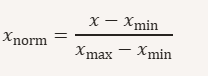

Виконайте код нижче:

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Завантаження об'єднаних даних
df = pd.read_csv("clients_sales_merged.csv")

# Заповнення пропусків
df["Вік"] = df["Вік"].fillna(df["Вік"].mean())
df["Продажі"] = df["Продажі"].fillna(df["Продажі"].mean())

# Ініціалізація нормалізатора
scaler = MinMaxScaler()

# Нормалізація двох колонок
df[["Вік_norm", "Продажі_norm"]] = scaler.fit_transform(df[["Вік", "Продажі"]])

# Виведення результату
print(df[["Клієнт", "Вік", "Вік_norm", "Продажі", "Продажі_norm"]].head())

** Завдання для самостійного виконання:** Побудова індексу активності
Файл: clients_sales_merged.csv

Завдання:
Нормалізуйте "Вік" і "Продажі" у діапазон [0, 1].

Створіть нову колонку "Індекс активності" як середнє між нормалізованим віком і продажами.

Виведіть топ-5 клієнтів з найвищим індексом.

In [ ]:
# Ваш код тут

Ваши висновки тут:

**Індивідуальне завдання**
Для даних з файлів, які використовувались в цій практичній роботі

Розв'яжіть задачу свого варіанту.

1️⃣ Оцінка якості даних
Порахуйте частку пропущених значень у кожній колонці.

Виведіть топ-3 колонки з найбільшими проблемами.

2️⃣ Виявлення дублікатів
Знайдіть дублікати по "Клієнт" + "Рік" + "Квартал".

Видаліть їх і порівняйте розмір таблиці до/після.

3️⃣ Фільтрація за віковими групами
Виведіть клієнтів віком <30, які мають продажі вище середнього.

Скільки таких клієнтів у кожному місті?

4️⃣ Порівняння нормалізованих ознак
Побудуйте нову колонку "Активність" як різницю між Продажі_norm і Вік_norm.

Виведіть топ-5 клієнтів з найвищою активністю.

5️⃣ Аналіз сезонності
Згрупуйте продажі по "Квартал" і побудуйте таблицю середніх значень.

Який квартал найактивніший?

6️⃣ Об’єднання з перевіркою відповідності
Після об’єднання clients.csv і sales_q.csv, перевірте:

чи всі клієнти мають продажі?

чи всі продажі мають клієнтів?

7️⃣ Групування по містах і роках
Побудуйте ієрархічну таблицю "Місто" → "Рік" → кількість клієнтів.

Виведіть міста з ростом активності у 2024.

8️⃣ Створення категорії “Проблемний запис”
Позначте рядки, де є пропуски або викиди, як "Проблемний" = True.

Порахуйте частку таких записів.

9️⃣ Дискретизація продажів
Розбийте "Продажі" на категорії: Низькі, Середні, Високі.

Порівняйте віковий склад клієнтів у кожній групі.

🔟 Побудова індексу довіри до запису
Створіть колонку "Довіра":

1.0 — якщо немає пропусків і викидів

0.5 — якщо є пропуски, але заповнені

0.0 — якщо є викиди

In [ ]:
#Ваш код тут:

Ваші висновки тут: